In [2]:
from data_pipeline import *
from utils import *
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats.multitest import multipletests

In [3]:
expr, gene_symbols, sample_names = load_data(root_gene=None)
nb_samples, nb_genes = expr.shape

Found 4297 genes in datafile


# E. coli intensities histogram

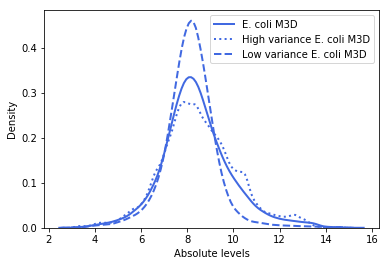

In [24]:
plot_intensities(expr);

# E. coli gene ranges histogram

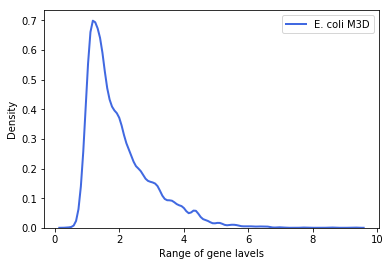

In [25]:
plot_gene_ranges(expr);

# E. coli cluster map

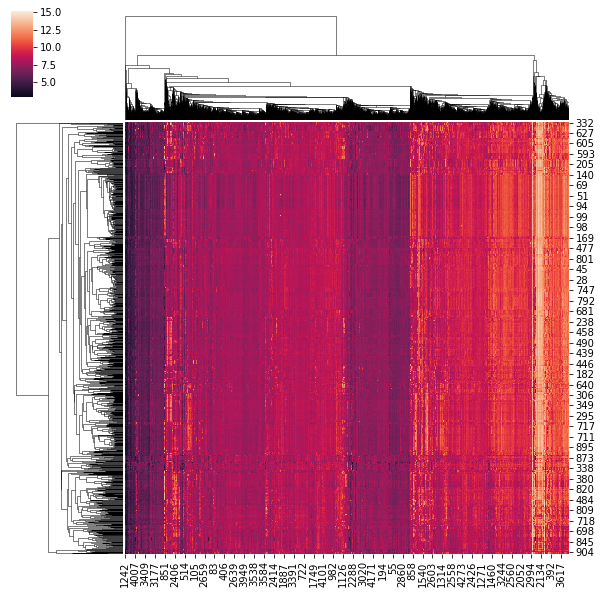

In [26]:
sns.clustermap(expr);

# E. coli TF-TG and TG-TG correlations

In [27]:
tf_tg_corr, tg_tg_corr = compute_tf_tg_corrs(expr, gene_symbols)
back_corr = correlations_list(expr, expr)

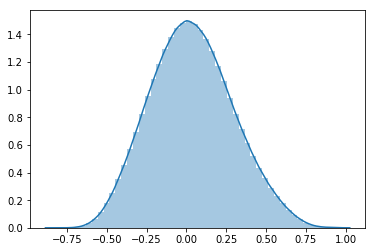

In [28]:
sns.distplot(back_corr);

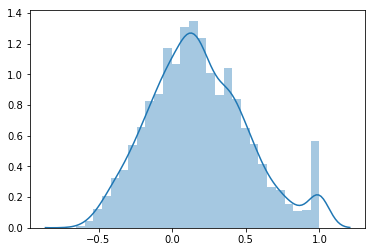

In [29]:
sns.distplot(tf_tg_corr);

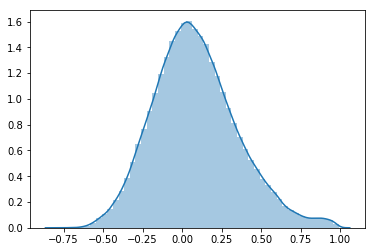

In [30]:
sns.distplot(tg_tg_corr);

# E. coli TF-TG histogram

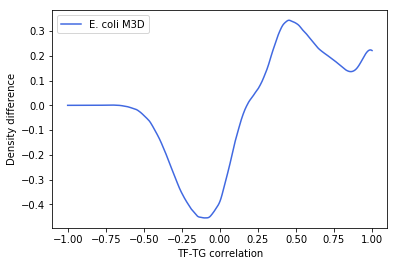

In [41]:
plot_difference_histogram(tf_tg_corr, back_corr, 'TF-TG correlation');

# E. coli TG-TG histogram

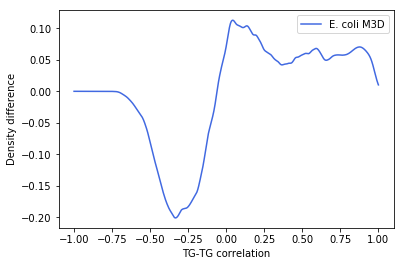

In [42]:
# CRP
plot_difference_histogram(tg_tg_corr, back_corr, 'TG-TG correlation');

# E. coli TF activity histogram

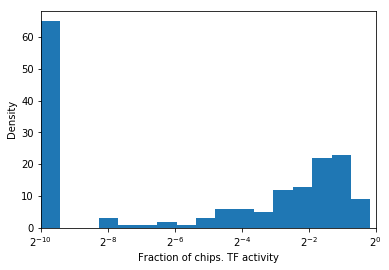

In [33]:
# CRP
plot_tf_activity_histogram(expr, gene_symbols)

# Quantitative analysis

In [4]:
# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = expr[train_idxs, :]
expr_test = expr[test_idxs, :]

# Compute scores
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
scores = compute_scores(expr_test, expr_train, gene_symbols)
print('Scores')
for name, score in zip(score_names, scores):
    print('{}: {}'.format(name, score))

Scores
S_dist: 0.9252001130527209
S_dend: 0.3565119286119809
S_sdcc: 0.0008152527855979566
S_tftg: 0.9228562561627353
S_tgtg: 0.9515038350566738
S_tfac: 0.9799788104815824
